In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [2]:
%store -r X
%store -r Y
%store -r X_train
%store -r Y_train
%store -r X_test
%store -r Y_test
%store -r X_train_iqr
%store -r X_test_iqr

In [3]:
def report(model, X, Y, text = "training"):
    Y_pred = model.predict(X)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report(Y, Y_pred))
    print("---------------------------------------------------------------------------------")
    print(f'Confusion matrix for {text} set:')
    print(pd.DataFrame(confusion_matrix(Y, Y_pred), columns=['N', 'P'], index=['N', 'P']))

In [4]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train_iqr = scaler.transform(X_train_iqr)
X_test_iqr = scaler.transform(X_test_iqr)

In [5]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [6]:
report(knn, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     15005
           1       0.75      0.72      0.73     14728

    accuracy                           0.74     29733
   macro avg       0.74      0.74      0.74     29733
weighted avg       0.74      0.74      0.74     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  11443   3562
P   4184  10544


In [7]:
report(knn, X_test, Y_test, "test")

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      5077
           1       0.60      0.57      0.58      4834

    accuracy                           0.60      9911
   macro avg       0.60      0.60      0.60      9911
weighted avg       0.60      0.60      0.60      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3194  1883
P  2059  2775


In [8]:
params = {'n_neighbors': range(10, 30, 2),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

In [9]:
estimator = GridSearchCV(KNeighborsClassifier(), params, cv = 4, verbose = 4)

In [10]:
estimator.fit(X_train, Y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
[CV 1/4] END n_neighbors=10, p=1, weights=uniform;, score=0.610 total time=   3.3s
[CV 2/4] END n_neighbors=10, p=1, weights=uniform;, score=0.602 total time=   3.3s
[CV 3/4] END n_neighbors=10, p=1, weights=uniform;, score=0.614 total time=   3.2s
[CV 4/4] END n_neighbors=10, p=1, weights=uniform;, score=0.616 total time=   3.2s
[CV 1/4] END n_neighbors=10, p=1, weights=distance;, score=0.613 total time=   3.4s
[CV 2/4] END n_neighbors=10, p=1, weights=distance;, score=0.612 total time=   3.3s
[CV 3/4] END n_neighbors=10, p=1, weights=distance;, score=0.617 total time=   3.1s
[CV 4/4] END n_neighbors=10, p=1, weights=distance;, score=0.616 total time=   3.3s
[CV 1/4] END n_neighbors=10, p=2, weights=uniform;, score=0.608 total time=   0.7s
[CV 2/4] END n_neighbors=10, p=2, weights=uniform;, score=0.605 total time=   0.7s
[CV 3/4] END n_neighbors=10, p=2, weights=uniform;, score=0.613 total time=   0.6s
[CV 4/4] END n_neighb

[CV 3/4] END n_neighbors=22, p=1, weights=uniform;, score=0.622 total time=   3.4s
[CV 4/4] END n_neighbors=22, p=1, weights=uniform;, score=0.627 total time=   3.3s
[CV 1/4] END n_neighbors=22, p=1, weights=distance;, score=0.626 total time=   3.3s
[CV 2/4] END n_neighbors=22, p=1, weights=distance;, score=0.626 total time=   3.7s
[CV 3/4] END n_neighbors=22, p=1, weights=distance;, score=0.628 total time=   3.2s
[CV 4/4] END n_neighbors=22, p=1, weights=distance;, score=0.631 total time=   3.3s
[CV 1/4] END n_neighbors=22, p=2, weights=uniform;, score=0.614 total time=   0.6s
[CV 2/4] END n_neighbors=22, p=2, weights=uniform;, score=0.620 total time=   0.9s
[CV 3/4] END n_neighbors=22, p=2, weights=uniform;, score=0.623 total time=   0.8s
[CV 4/4] END n_neighbors=22, p=2, weights=uniform;, score=0.616 total time=   0.8s
[CV 1/4] END n_neighbors=22, p=2, weights=distance;, score=0.621 total time=   0.5s
[CV 2/4] END n_neighbors=22, p=2, weights=distance;, score=0.623 total time=   0.6

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [11]:
estimator.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'distance'}

In [12]:
estimator.best_score_

0.6310497307468557

In [13]:
report(estimator.best_estimator_, X_train, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15005
           1       1.00      1.00      1.00     14728

    accuracy                           1.00     29733
   macro avg       1.00      1.00      1.00     29733
weighted avg       1.00      1.00      1.00     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  15005      0
P      0  14728


In [14]:
report(estimator.best_estimator_, X_test, Y_test, 'test')

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      5077
           1       0.64      0.58      0.61      4834

    accuracy                           0.64      9911
   macro avg       0.64      0.64      0.64      9911
weighted avg       0.64      0.64      0.64      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3497  1580
P  2016  2818


In [15]:
knn.fit(X_train_iqr, Y_train)

KNeighborsClassifier()

In [16]:
report(knn, X_train_iqr, Y_train)

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     15005
           1       0.73      0.71      0.72     14728

    accuracy                           0.73     29733
   macro avg       0.73      0.73      0.73     29733
weighted avg       0.73      0.73      0.73     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  11082   3923
P   4237  10491


In [17]:
report(knn, X_test_iqr, Y_test, 'test')

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      5077
           1       0.58      0.56      0.57      4834

    accuracy                           0.58      9911
   macro avg       0.58      0.58      0.58      9911
weighted avg       0.58      0.58      0.58      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  3066  2011
P  2103  2731


In [18]:
estimator2 = GridSearchCV(KNeighborsClassifier(), params, cv = 4, verbose = 4)
estimator2.fit(X_train_iqr, Y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
[CV 1/4] END n_neighbors=10, p=1, weights=uniform;, score=0.590 total time=   3.5s
[CV 2/4] END n_neighbors=10, p=1, weights=uniform;, score=0.591 total time=   3.4s
[CV 3/4] END n_neighbors=10, p=1, weights=uniform;, score=0.583 total time=   3.5s
[CV 4/4] END n_neighbors=10, p=1, weights=uniform;, score=0.590 total time=   3.6s
[CV 1/4] END n_neighbors=10, p=1, weights=distance;, score=0.593 total time=   3.4s
[CV 2/4] END n_neighbors=10, p=1, weights=distance;, score=0.595 total time=   3.5s
[CV 3/4] END n_neighbors=10, p=1, weights=distance;, score=0.593 total time=   3.5s
[CV 4/4] END n_neighbors=10, p=1, weights=distance;, score=0.594 total time=   4.4s
[CV 1/4] END n_neighbors=10, p=2, weights=uniform;, score=0.587 total time=   0.9s
[CV 2/4] END n_neighbors=10, p=2, weights=uniform;, score=0.582 total time=   0.8s
[CV 3/4] END n_neighbors=10, p=2, weights=uniform;, score=0.576 total time=   0.7s
[CV 4/4] END n_neighb

[CV 3/4] END n_neighbors=22, p=1, weights=uniform;, score=0.602 total time=   3.5s
[CV 4/4] END n_neighbors=22, p=1, weights=uniform;, score=0.603 total time=   3.4s
[CV 1/4] END n_neighbors=22, p=1, weights=distance;, score=0.609 total time=   3.2s
[CV 2/4] END n_neighbors=22, p=1, weights=distance;, score=0.608 total time=   3.3s
[CV 3/4] END n_neighbors=22, p=1, weights=distance;, score=0.604 total time=   3.3s
[CV 4/4] END n_neighbors=22, p=1, weights=distance;, score=0.605 total time=   3.3s
[CV 1/4] END n_neighbors=22, p=2, weights=uniform;, score=0.598 total time=   0.6s
[CV 2/4] END n_neighbors=22, p=2, weights=uniform;, score=0.594 total time=   0.6s
[CV 3/4] END n_neighbors=22, p=2, weights=uniform;, score=0.585 total time=   0.7s
[CV 4/4] END n_neighbors=22, p=2, weights=uniform;, score=0.601 total time=   0.6s
[CV 1/4] END n_neighbors=22, p=2, weights=distance;, score=0.597 total time=   0.4s
[CV 2/4] END n_neighbors=22, p=2, weights=distance;, score=0.598 total time=   0.4

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [19]:
report(estimator2.best_estimator_, X_train_iqr, Y_train)
report(estimator2.best_estimator_, X_test_iqr, Y_test, 'test')

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15005
           1       1.00      1.00      1.00     14728

    accuracy                           1.00     29733
   macro avg       1.00      1.00      1.00     29733
weighted avg       1.00      1.00      1.00     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  15005      0
P      0  14728
Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.64      0.63      5077
           1       0.61      0.58      0.59      4834

    accuracy                           0.61 

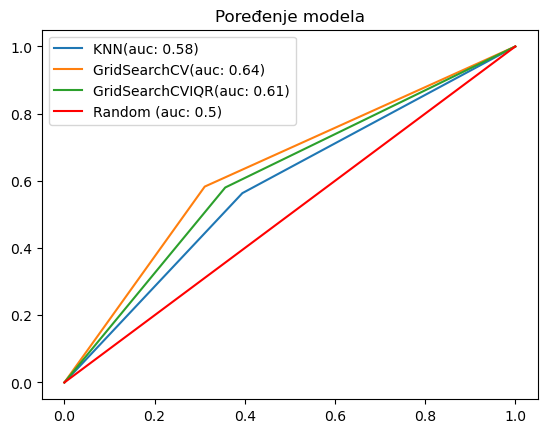

In [20]:
models = [knn, estimator.best_estimator_, estimator2.best_estimator_]
model_names = ['KNN', 'GridSearchCV', 'GridSearchCVIQR']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()